In [2]:
import keras

2022-10-17 15:26:39.504830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 15:26:39.600556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 15:26:39.600571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-17 15:26:39.622387: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 15:26:40.181843: W tensorflow/stream_executor/platform/de

In [3]:
import numpy as np

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Plotting some of the digits

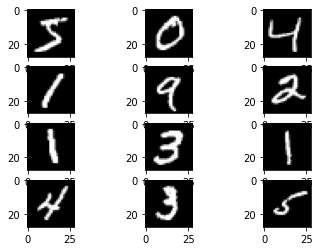

In [5]:
import matplotlib.pyplot as plt

for i in range(12):  
    plt.subplot(4, 3, 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    
plt.show()


# Preprocessing the data 

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [7]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# Building a model

In [8]:
from keras import layers

In [9]:
model = keras.Sequential([
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

2022-10-17 15:30:45.218197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 15:30:45.218621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 15:30:45.218740: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-17 15:30:45.218847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-17 15:30:45.218951: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

# Training the model and monitoring its performance

In [10]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.4)

Epoch 1/30
282/282 [==============================] - 1s 4ms/step - loss: 0.3552 - accuracy: 0.9024 - val_loss: 0.2477 - val_accuracy: 0.9265
Epoch 2/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9517 - val_loss: 0.1909 - val_accuracy: 0.9436
Epoch 3/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1150 - accuracy: 0.9663 - val_loss: 0.1349 - val_accuracy: 0.9601
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9752 - val_loss: 0.1290 - val_accuracy: 0.9613
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9818 - val_loss: 0.1197 - val_accuracy: 0.9651
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9858 - val_loss: 0.1162 - val_accuracy: 0.9652
Epoch 7/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.9885 - val_loss: 0.1077 - val_accuracy: 0.9689
Epoch 

# Plotting the training and validation losses

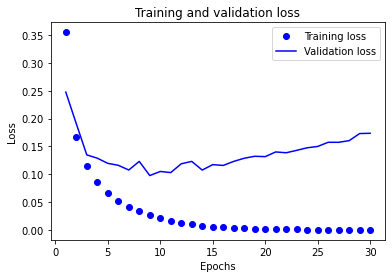

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Evaluating the model on test data

In [12]:
results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 916us/step - loss: 0.1361 - accuracy: 0.9778


In [13]:
results

[0.13614240288734436, 0.9778000116348267]

# Making a prediction about a particular test digit

In [14]:
predictions = model.predict(test_images[79].reshape(1, 784))
predictions.argmax()

1/1 [==============================] - 0s 48ms/step


7

# Comparing the model prediction with the actual data

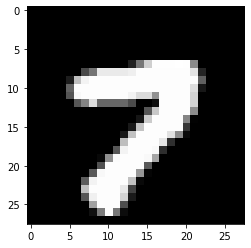

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(test_images[79], cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
test_labels[79]

7